# Panads与数据分析

## 序列和数据帧的基本运算

In [111]:
import numpy as np
import pandas as pd
np.random.seed(5)
df1 = pd.DataFrame(np.random.randn(5,4), columns= ['A','B','C','D'])
df2 = pd.DataFrame(np.random.randn(4,3), columns= ['B','C','D'])


In [112]:
df1

,A,B,C,D
0,0.441227,-0.330870,2.430771,-0.252092
1,0.109610,1.582481,-0.909232,-0.591637
2,0.187603,-0.329870,-1.192765,-0.204877
3,-0.358829,0.603472,-1.664789,-0.700179
4,1.151391,1.857331,-1.511180,0.644848


In [113]:
df2

,B,C,D
0,-0.980608,-0.856853,-0.871879
1,-0.422508,0.996440,0.712421
2,0.059144,-0.363311,0.003289
3,-0.105930,0.793053,-0.631572


相加法则，没有元素的数据格，结果会变成NaN


In [114]:
df = df1 + df2
df

,A,B,C,D
0,NaN,-1.311478,1.573918,-1.123971
1,NaN,1.159973,0.087207,0.120785
2,NaN,-0.270726,-1.556075,-0.201588
3,NaN,0.497541,-0.871735,-1.331751
4,NaN,NaN,NaN,NaN


In [115]:
df1.add(df2,fill_value = 0.0)

,A,B,C,D
0,0.441227,-1.311478,1.573918,-1.123971
1,0.109610,1.159973,0.087207,0.120785
2,0.187603,-0.270726,-1.556075,-0.201588
3,-0.358829,0.497541,-0.871735,-1.331751
4,1.151391,1.857331,-1.511180,0.644848


序列可以添加进数据帧，因为Pandas包的限制，故不使用append()而是concat()
需要先将序列变成dataframe，然后将行标签变为列标签

In [116]:
s = pd.Series([0.793053,0.631572,0.006195,0.101068],
              index = ['A','B','C','D'])
s1 = pd.DataFrame(s.to_frame().values.T, columns= s.index)
dfa = pd.concat([df,s1], ignore_index= True)
dfa

,A,B,C,D
0,NaN,-1.311478,1.573918,-1.123971
1,NaN,1.159973,0.087207,0.120785
2,NaN,-0.270726,-1.556075,-0.201588
3,NaN,0.497541,-0.871735,-1.331751
4,NaN,NaN,NaN,NaN
5,0.793053,0.631572,0.006195,0.101068


使用fillna()可以将数据帧中的NaN填充为需要的值，但不会改变原有数据帧
参数inplace = True是设定替换发生在原来的数据帧上


In [117]:
dfa.fillna(0.0)


,A,B,C,D
0,0.000000,-1.311478,1.573918,-1.123971
1,0.000000,1.159973,0.087207,0.120785
2,0.000000,-0.270726,-1.556075,-0.201588
3,0.000000,0.497541,-0.871735,-1.331751
4,0.000000,0.000000,0.000000,0.000000
5,0.793053,0.631572,0.006195,0.101068


In [118]:
dfa.dropna()

,A,B,C,D
5,0.793053,0.631572,0.006195,0.101068


In [119]:
dfa.fillna(0.0, inplace= True)
dfa

,A,B,C,D
0,0.000000,-1.311478,1.573918,-1.123971
1,0.000000,1.159973,0.087207,0.120785
2,0.000000,-0.270726,-1.556075,-0.201588
3,0.000000,0.497541,-0.871735,-1.331751
4,0.000000,0.000000,0.000000,0.000000
5,0.793053,0.631572,0.006195,0.101068


In [120]:
df.rename(columns= {'A':'AA','B':'BB'})
df.fillna(0.0, inplace= True)

对于数据帧，可以通过sort_index()或sort_values()实现对其按照索引或者数值排序
参数ascending = False 实现索引从大到小排序


In [121]:
df.sort_index(ascending= False)

,A,B,C,D
4,0.0,0.000000,0.000000,0.000000
3,0.0,0.497541,-0.871735,-1.331751
2,0.0,-0.270726,-1.556075,-0.201588
1,0.0,1.159973,0.087207,0.120785
0,0.0,-1.311478,1.573918,-1.123971


In [122]:
df.sort_values(by=['B'],ascending= False)

,A,B,C,D
1,0.0,1.159973,0.087207,0.120785
3,0.0,0.497541,-0.871735,-1.331751
4,0.0,0.000000,0.000000,0.000000
2,0.0,-0.270726,-1.556075,-0.201588
0,0.0,-1.311478,1.573918,-1.123971



## 设定索引，重新索引与重建索引


In [123]:
df = pd.DataFrame(np.random.randn(5,3), columns= ['A','B','C'])
df.set_index(pd.Index(['a','b','c','d','e']))

,A,B,C
a,-0.006195,-0.101068,-0.052308
b,0.249218,0.197660,1.334849
c,-0.086876,1.561532,-0.305853
d,-0.477731,0.100738,0.355438
e,0.269612,1.291963,1.139343


重新索引是指创建一个适应新索引的新对象，Pandas会通过这种方法根据新索引的顺序重新排序，如果新的索引中存在原索引中不存在的索引，将会使用NaN值进行填充


In [124]:
df.reindex([1,2,3,'x','y'])
#1\2\3是原数据帧中已有的索引，索引新数据帧会直接调取；而x和y在原索引中不存在所以会以NaN值填充

,A,B,C
1,0.249218,0.197660,1.334849
2,-0.086876,1.561532,-0.305853
3,-0.477731,0.100738,0.355438
x,NaN,NaN,NaN
y,NaN,NaN,NaN


In [125]:
df.reindex([1,2,3,'x','y'], fill_value=0.0)

,A,B,C
1,0.249218,0.197660,1.334849
2,-0.086876,1.561532,-0.305853
3,-0.477731,0.100738,0.355438
x,0.000000,0.000000,0.000000
y,0.000000,0.000000,0.000000


In [126]:
df.reindex(['A','B','C','D','E'], axis= 'columns')

,A,B,C,D,E
0,-0.006195,-0.101068,-0.052308,NaN,NaN
1,0.249218,0.197660,1.334849,NaN,NaN
2,-0.086876,1.561532,-0.305853,NaN,NaN
3,-0.477731,0.100738,0.355438,NaN,NaN
4,0.269612,1.291963,1.139343,NaN,NaN


In [127]:
df = pd.DataFrame(np.random.randn(5,3), index=[1,3,5,8,10],columns= ['A','B','C'])
df

,A,B,C
1,0.494440,-0.336336,-0.100614
3,1.413398,0.221254,-1.310773
5,-0.689565,-0.577513,1.152205
8,-0.107164,2.260107,0.656619
10,0.124807,-0.435704,0.972179


In [128]:
df.reset_index()

,index,A,B,C
0,1,0.494440,-0.336336,-0.100614
1,3,1.413398,0.221254,-1.310773
2,5,-0.689565,-0.577513,1.152205
3,8,-0.107164,2.260107,0.656619
4,10,0.124807,-0.435704,0.972179


参数drop= True能够去掉原索引值

In [129]:
df.reset_index(drop= True)

,A,B,C
0,0.494440,-0.336336,-0.100614
1,1.413398,0.221254,-1.310773
2,-0.689565,-0.577513,1.152205
3,-0.107164,2.260107,0.656619
4,0.124807,-0.435704,0.972179


In [130]:
import pandas as pd
df_excel = pd.read_excel('./lh_price.xlsx',index_col= 'date' ,usecols=['date','open','close','high','low','volume'])

In [131]:
df_lh1 = df_excel['2021-1-8':'2021-1-18'][['open','close']]
df_lh1

,open,close
date,,
2021-01-08,26500,24935
2021-01-11,24200,23250
2021-01-12,23250,23495
2021-01-13,23700,23745
2021-01-14,23625,22700
2021-01-15,22800,22650
2021-01-18,22640,23060


In [132]:
df_lh2 = df_excel['2021-1-14':'2021-1-29'][['high','low']]
df_lh2

,high,low
date,,
2021-01-14,23925,22605
2021-01-15,22960,22300
2021-01-18,23565,22640
2021-01-19,23275,22885
2021-01-20,23120,22600
2021-01-21,23210,22960
2021-01-22,23080,22800
2021-01-25,23605,22600
2021-01-26,23980,23315


In [133]:
df_lh1.reset_index(inplace= True)
df_lh2.reset_index(inplace= True)

In [134]:
df_lh = pd.merge(df_lh1,df_lh2)
df_lh

,date,open,close,high,low
0,2021-01-14,23625,22700,23925,22605
1,2021-01-15,22800,22650,22960,22300
2,2021-01-18,22640,23060,23565,22640


In [135]:
df_lh = pd.merge(df_lh1,df_lh2,how = 'outer', on= 'date')
df_lh

,date,open,close,high,low
0,2021-01-08,26500.0,24935.0,NaN,NaN
1,2021-01-11,24200.0,23250.0,NaN,NaN
2,2021-01-12,23250.0,23495.0,NaN,NaN
3,2021-01-13,23700.0,23745.0,NaN,NaN
4,2021-01-14,23625.0,22700.0,23925.0,22605.0
5,2021-01-15,22800.0,22650.0,22960.0,22300.0
6,2021-01-18,22640.0,23060.0,23565.0,22640.0
7,2021-01-19,NaN,NaN,23275.0,22885.0
8,2021-01-20,NaN,NaN,23120.0,22600.0
9,2021-01-21,NaN,NaN,23210.0,22960.0


In [136]:
df_lh = pd.merge(df_lh1,df_lh2,how = 'left', on= 'date')
df_lh

,date,open,close,high,low
0,2021-01-08,26500,24935,NaN,NaN
1,2021-01-11,24200,23250,NaN,NaN
2,2021-01-12,23250,23495,NaN,NaN
3,2021-01-13,23700,23745,NaN,NaN
4,2021-01-14,23625,22700,23925.0,22605.0
5,2021-01-15,22800,22650,22960.0,22300.0
6,2021-01-18,22640,23060,23565.0,22640.0


In [137]:
df_lh = pd.merge(df_lh1,df_lh2,how = 'right', on= 'date')
df_lh

,date,open,close,high,low
0,2021-01-14,23625.0,22700.0,23925,22605
1,2021-01-15,22800.0,22650.0,22960,22300
2,2021-01-18,22640.0,23060.0,23565,22640
3,2021-01-19,NaN,NaN,23275,22885
4,2021-01-20,NaN,NaN,23120,22600
5,2021-01-21,NaN,NaN,23210,22960
6,2021-01-22,NaN,NaN,23080,22800
7,2021-01-25,NaN,NaN,23605,22600
8,2021-01-26,NaN,NaN,23980,23315
9,2021-01-27,NaN,NaN,23900,23620


指定任意两个数据帧的不同名列做为连接键

In [138]:
df_lh1.rename(columns = {'date':'date1'}, inplace= True)
df_lh2.rename(columns = {'date':'date2'}, inplace= True)

In [139]:
df_lh1

,date1,open,close
0,2021-01-08,26500,24935
1,2021-01-11,24200,23250
2,2021-01-12,23250,23495
3,2021-01-13,23700,23745
4,2021-01-14,23625,22700
5,2021-01-15,22800,22650
6,2021-01-18,22640,23060


In [140]:
df_lh2

,date2,high,low
0,2021-01-14,23925,22605
1,2021-01-15,22960,22300
2,2021-01-18,23565,22640
3,2021-01-19,23275,22885
4,2021-01-20,23120,22600
5,2021-01-21,23210,22960
6,2021-01-22,23080,22800
7,2021-01-25,23605,22600
8,2021-01-26,23980,23315
9,2021-01-27,23900,23620


In [141]:
df_lh = pd.merge(df_lh1,df_lh2, how= 'inner',left_on='date1',right_on='date2')

In [142]:
df_lh

,date1,open,close,date2,high,low
0,2021-01-14,23625,22700,2021-01-14,23925,22605
1,2021-01-15,22800,22650,2021-01-15,22960,22300
2,2021-01-18,22640,23060,2021-01-18,23565,22640


## 数据帧的列连接
列连接（join）默认链接为左连接


In [143]:
df_lh1 = df_excel['2021-1-8':'2021-1-18'][['open','close']]
df_lh2 = df_excel['2021-1-14':'2021-1-29'][['high','low']]
df_lh = df_lh1.join(df_lh2)
df_lh

,open,close,high,low
date,,,,
2021-01-08,26500,24935,NaN,NaN
2021-01-11,24200,23250,NaN,NaN
2021-01-12,23250,23495,NaN,NaN
2021-01-13,23700,23745,NaN,NaN
2021-01-14,23625,22700,23925.0,22605.0
2021-01-15,22800,22650,22960.0,22300.0
2021-01-18,22640,23060,23565.0,22640.0


In [144]:
df_lh3 = df_lh1.reset_index()
df_lh3

,date,open,close
0,2021-01-08,26500,24935
1,2021-01-11,24200,23250
2,2021-01-12,23250,23495
3,2021-01-13,23700,23745
4,2021-01-14,23625,22700
5,2021-01-15,22800,22650
6,2021-01-18,22640,23060


In [145]:
df_lh = df_lh3.join(df_lh1,on= 'date',lsuffix='_3',rsuffix='_1')
df_lh

,date,open_3,close_3,open_1,close_1
0,2021-01-08,26500,24935,26500,24935
1,2021-01-11,24200,23250,24200,23250
2,2021-01-12,23250,23495,23250,23495
3,2021-01-13,23700,23745,23700,23745
4,2021-01-14,23625,22700,23625,22700
5,2021-01-15,22800,22650,22800,22650
6,2021-01-18,22640,23060,22640,23060


## 数据帧的拼接
concat（）默认行拼接&外拼接


In [146]:
df_lh3 = df_excel['2021-1-10':'2021-1-22'][['open','close','volume']]
df_lh = pd.concat([df_lh1,df_lh2,df_lh3], sort=False)
df_lh

,open,close,high,low,volume
date,,,,,
2021-01-08,26500.0,24935.0,NaN,NaN,NaN
2021-01-11,24200.0,23250.0,NaN,NaN,NaN
2021-01-12,23250.0,23495.0,NaN,NaN,NaN
2021-01-13,23700.0,23745.0,NaN,NaN,NaN
2021-01-14,23625.0,22700.0,NaN,NaN,NaN
2021-01-15,22800.0,22650.0,NaN,NaN,NaN
2021-01-18,22640.0,23060.0,NaN,NaN,NaN
2021-01-14,NaN,NaN,23925.0,22605.0,NaN
2021-01-15,NaN,NaN,22960.0,22300.0,NaN


# 金融计算
## 计算简单收益率

In [147]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import pylab
import matplotlib.mlab as mlab
import yfinance as yf
yf.pdr_override()

#df = pdr.get_data_yahoo('TSLA', start = '2020-01-01', end = '2020-12-31')
df = yf.download('TSLA', start = '2020-01-01', end = '2020-12-31')

[*********************100%***********************]  1 of 1 completed


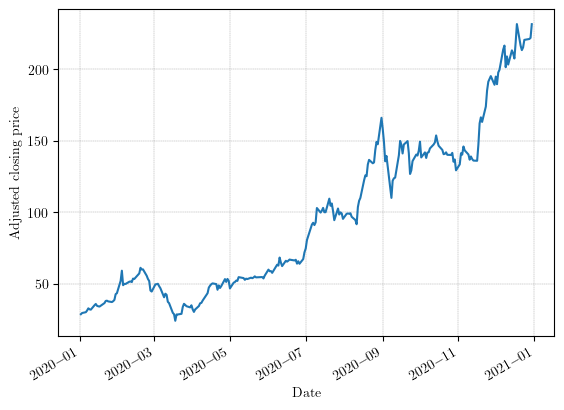

In [152]:
#plt.close('all')

fig, ax = plt.subplots()

df['Adj Close'].plot()
plt.xlabel('Date')
plt.ylabel('Adjusted closing price')

plt.rcParams["font.size"] = 10
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])
plt.show()

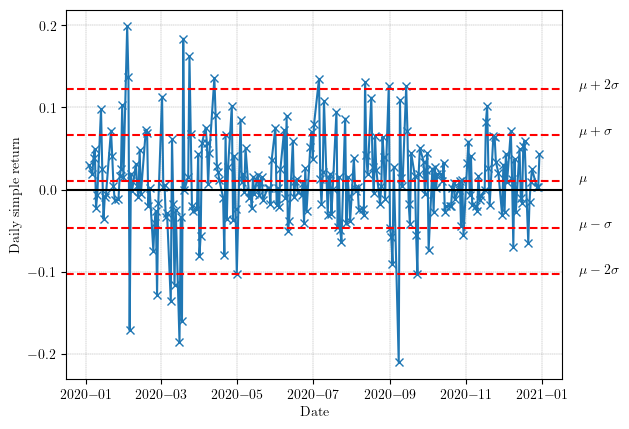

In [153]:
# daily returns
daily_simple_returns_pct = df['Adj Close'].pct_change()
# daily returns are not in the format of percentage.
values = daily_simple_returns_pct[1:]
mu, sigma = stats.norm.fit(values)

fig, ax = plt.subplots()

ax.plot(daily_simple_returns_pct,marker='x')

plt.axhline(y=0, color='k', linestyle='-')

plt.axhline(y=mu, color='r', linestyle='--')
plt.text(pd.to_datetime('2021-01-31'), mu, r'$\mu$')
plt.axhline(y=mu + sigma, color='r', linestyle='--')
plt.text(pd.to_datetime('2021-01-31'), mu + sigma, r'$\mu + \sigma$')
plt.axhline(y=mu - sigma, color='r', linestyle='--')
plt.text(pd.to_datetime('2021-01-31'), mu - sigma, r'$\mu - \sigma$')
plt.axhline(y=mu + 2*sigma, color='r', linestyle='--')
plt.text(pd.to_datetime('2021-01-31'), mu + 2*sigma, r'$\mu + 2\sigma$')
plt.axhline(y=mu - 2*sigma, color='r', linestyle='--')
plt.text(pd.to_datetime('2021-01-31'), mu - 2*sigma, r'$\mu - 2\sigma$')
plt.xlabel('Date')
plt.ylabel('Daily simple return')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams["font.size"] = 10
plt.rcParams['text.usetex'] = True

ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
plt.show()

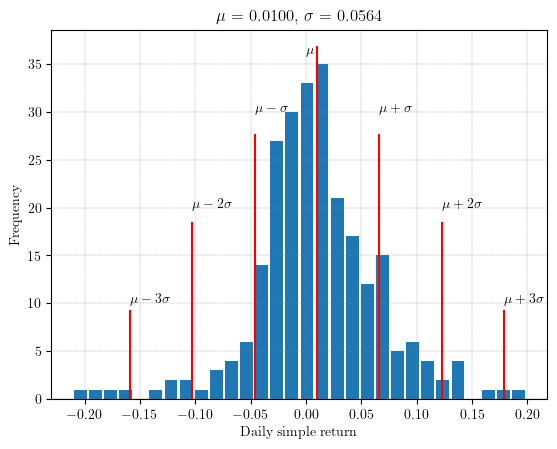

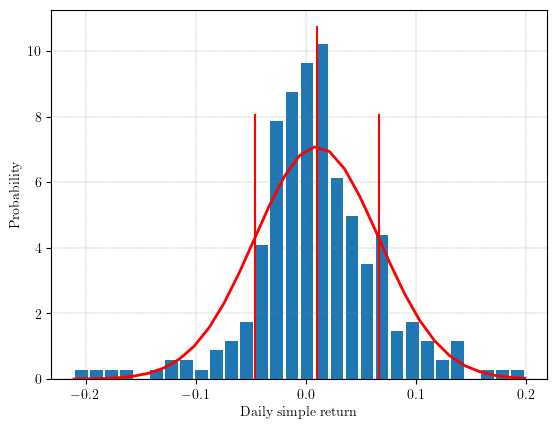

In [154]:

label = '$\it{\mu}$ = %.4f, $\it{\sigma}$ = %.4f' % (mu, sigma)

fig, ax = plt.subplots()
ax.hist(values, bins=30, rwidth=0.85)
y_lim = ax.get_ylim()
plt.plot([mu,mu],y_lim,'r')
plt.plot([mu + sigma,mu + sigma],0.75*np.asarray(y_lim),'r')
plt.plot([mu - sigma,mu - sigma],0.75*np.asarray(y_lim),'r')
plt.plot([mu + 2.0*sigma,mu + 2.0*sigma],0.5*np.asarray(y_lim),'r')
plt.plot([mu - 2.0*sigma,mu - 2.0*sigma],0.5*np.asarray(y_lim),'r')
plt.plot([mu + 3.0*sigma,mu + 3.0*sigma],0.25*np.asarray(y_lim),'r')
plt.plot([mu - 3.0*sigma,mu - 3.0*sigma],0.25*np.asarray(y_lim),'r')

plt.text(0, 36, r'$\mu$')
plt.text(mu + sigma,30, r'$\mu + \sigma$')
plt.text(mu - sigma,30, r'$\mu - \sigma$')
plt.text(mu + 2.0*sigma,20,r'$\mu + 2\sigma$')
plt.text(mu - 2.0*sigma,20,r'$\mu - 2\sigma$')
plt.text(mu + 3.0*sigma,10,r'$\mu + 3\sigma$')
plt.text(mu - 3.0*sigma,10,r'$\mu - 3\sigma$')

plt.title(label)
ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
plt.xlabel('Daily simple return')
plt.ylabel('Frequency')

# add a normal fit PDF curve

fig, ax = plt.subplots()
# the histogram of the data
n, bins, patches = plt.hist(values, 30, density=1, rwidth=0.85)
y_lim = ax.get_ylim()
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line, 'r-', linewidth=2)

plt.plot([mu,mu],y_lim,'r')
plt.plot([mu + sigma,mu + sigma],0.75*np.asarray(y_lim),'r')
plt.plot([mu - sigma,mu - sigma],0.75*np.asarray(y_lim),'r')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams["font.size"] = 10
plt.xlabel('Daily simple return')
plt.ylabel('Probability')


ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
plt.show()

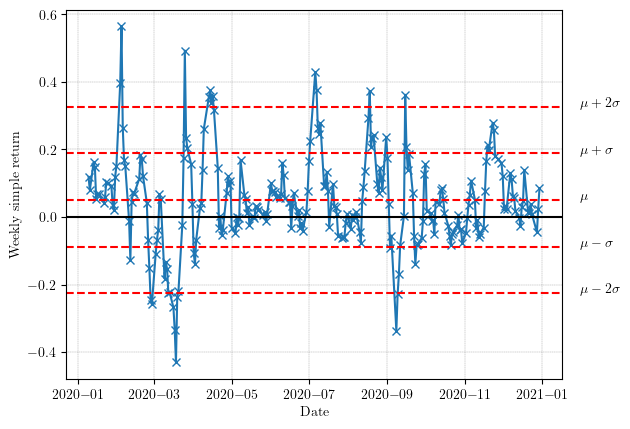

In [155]:

wkly_simple_returns_pct = df['Adj Close'].pct_change(periods=5)
# not percentage
values = wkly_simple_returns_pct[5:]
mu, sigma = stats.norm.fit(values)

fig, ax = plt.subplots()

ax.plot(wkly_simple_returns_pct, marker='x')
plt.axhline(y=0, color='k', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Weekly simple return')

plt.axhline(y=mu, color='r', linestyle='--')
plt.text(pd.to_datetime('2021-01-31'), mu, r'$\mu$')
plt.axhline(y=mu + sigma, color='r', linestyle='--')
plt.text(pd.to_datetime('2021-01-31'), mu + sigma, r'$\mu + \sigma$')
plt.axhline(y=mu - sigma, color='r', linestyle='--')
plt.text(pd.to_datetime('2021-01-31'), mu - sigma, r'$\mu - \sigma$')
plt.axhline(y=mu + 2*sigma, color='r', linestyle='--')
plt.text(pd.to_datetime('2021-01-31'), mu + 2*sigma, r'$\mu + 2\sigma$')
plt.axhline(y=mu - 2*sigma, color='r', linestyle='--')
plt.text(pd.to_datetime('2021-01-31'), mu - 2*sigma, r'$\mu - 2\sigma$')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams["font.size"] = 10

ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])

plt.show()
